### Importing Libraries

In [1]:
import numpy as np
import threading
import os
import time
import multiprocessing
import cv2
import matplotlib.pyplot as plt

### Q1

In [2]:
# n = size of the square matrix
n = 5
min_val = 0
max_val = 10

A = np.random.randint(min_val,max_val,(n,n))
B = np.random.randint(min_val,max_val,(n,n))

In [3]:
def task(n, A, B, C):
    for i in range(n):  
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

In [4]:
# Defining the output matrix
C = [[0 for i in range(n)] for i in range(n)]
C

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [5]:
start = time.time()

C = task(n, A, B, C)

end = time.time()

C

[[129, 112, 105, 106, 115],
 [122, 110, 133, 126, 136],
 [104, 76, 79, 78, 31],
 [37, 31, 30, 28, 14],
 [137, 121, 94, 111, 109]]

In [6]:
print("Time:", end-start)

Time: 0.0009987354278564453


### Q2

In [7]:
# n = length of the array
n = 51
arr = np.random.randint(min_val,max_val,(n))
arr

array([1, 6, 2, 9, 2, 8, 5, 7, 3, 8, 2, 8, 2, 2, 4, 8, 3, 6, 5, 9, 2, 8,
       1, 5, 8, 0, 6, 2, 7, 6, 4, 3, 2, 0, 6, 5, 4, 8, 7, 5, 1, 0, 4, 1,
       9, 4, 3, 8, 3, 4, 5])

In [8]:
# Generating random number to be searched
search = np.random.randint(1, 10)

start = time.time()

for i in range(n):
    if(arr[i] == search):
        print("Search: {}\nIndex: {}".format(search, i))
        break
        
end = time.time()

Search: 5
Index: 6


In [9]:
print("Time:", end-start)

Time: 0.0


### Q3

In [10]:
# n = length of the array
n = 51
arr = np.random.randint(min_val,max_val,(n))
arr

array([0, 5, 4, 0, 9, 0, 6, 8, 6, 3, 0, 8, 4, 9, 6, 1, 0, 4, 4, 9, 8, 8,
       0, 9, 8, 4, 1, 0, 7, 5, 0, 7, 7, 3, 8, 2, 0, 1, 4, 7, 3, 2, 2, 1,
       5, 4, 0, 1, 8, 1, 6])

In [11]:
sum_ = 0

start = time.time()

for i in range(n):
    sum_=sum_+arr[i]

end = time.time()     

print(sum_)

208


In [12]:
print("Time:", end-start)

Time: 0.0


### Q4

In [13]:
def prime(n):
    flag = True
    for i in range(2,n//2):
        if(n%i==0):
            flag = False
            break
    
    if(flag):
        return n
    
    else:
        return 0

In [14]:
# Checking the elements that are prime 
prime_num = []
min_ = 2
max_ = 100

start = time.time()

for i in range(min_, max_+1):
    if(prime(i) == 0):
        continue
        
    else:
        prime_num.append(i)
        
end = time.time()

In [15]:
time_serial = end-start
print("Time: ", time_serial)

Time:  0.0


In [16]:
prime_num

[2,
 3,
 4,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

### Q5


In [17]:
# n = number of elements
n = 6
min = 0
max = 1000

arr = np.random.randint(min, max, (n))

In [18]:
power_set = []
start = time.time()

x = len(arr)
for i in range(1 << x):
    power_set.append([arr[j] for j in range(x) if (i & (1 << j))])

In [19]:
def primePowerSet(power_set):# Checking the elements that are prime in the power set
    prime_subsets = []

    for i in range(len(power_set)):
        if(prime(sum(power_set[i])) == 0):
            continue

        else:
            prime_subsets.append(power_set[i])
    
    return prime_subsets

In [20]:
prime_subsets = primePowerSet(power_set)
end = time.time()

In [21]:
time_serial = end-start
print("Time: ", time_serial)

Time:  0.03191423416137695


In [22]:
prime_subsets

[[109],
 [533, 187, 109],
 [109, 462],
 [533, 187, 109, 462],
 [187, 253, 109, 422],
 [187, 253, 109, 462, 422]]

### Q6

In [23]:
def pali(word):
    flag=0
    if(word==word[::-1]):
        flag=1
    else:
        flag=0
        
    return flag

In [24]:
fp = open('Data/words.txt','r')
arr = []

for i in fp:
    arr.append(i.strip('\n'))

In [25]:
tim = []
ret = []

start = time.time()

for i in arr:
    if (pali(i)==1):
        ret.append(i)
    else:
        continue
        
end = time.time()

In [26]:
print("Time:",end-start)

Time: 0.13363218307495117


### Q7

In [27]:
img = cv2.imread('Data/trump.jpg')
img = cv2.resize(img, (512, 512))

In [28]:
kernel = (np.random.randint(-1, 1, (3,3,3)))

In [29]:
def convolvee(image):
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]

    pad = 0
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
        cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")
    # loop over the input image, "sliding" the kernel across
    # each (x, y)-coordinate from left-to-right and top to
    # bottom
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):

            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

            k = (roi * kernel).sum()

            output[y - pad, x - pad] = k


    output = (output * 255).astype("uint8")
    # return the output image
    return output

In [30]:
start = time.time()

new_img = convolvee(img)

end = time.time()

In [31]:
print("Time:",end-start)

Time: 1.7817931175231934


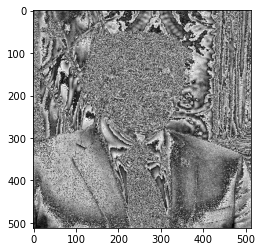

In [32]:
plt.imshow(new_img, cmap='gray')

### Pymp Trial

In [41]:
from __future__ import print_function
import pymp

In [42]:
start = time.time()

ex_array = np.zeros((100,), dtype='uint8')
for index in range(0, 100):
    ex_array[index] = 1
    print('Yay! {} done!'.format(index))
    
end = time.time()

Yay! 0 done!
Yay! 1 done!
Yay! 2 done!
Yay! 3 done!
Yay! 4 done!
Yay! 5 done!
Yay! 6 done!
Yay! 7 done!
Yay! 8 done!
Yay! 9 done!
Yay! 10 done!
Yay! 11 done!
Yay! 12 done!
Yay! 13 done!
Yay! 14 done!
Yay! 15 done!
Yay! 16 done!
Yay! 17 done!
Yay! 18 done!
Yay! 19 done!
Yay! 20 done!
Yay! 21 done!
Yay! 22 done!
Yay! 23 done!
Yay! 24 done!
Yay! 25 done!
Yay! 26 done!
Yay! 27 done!
Yay! 28 done!
Yay! 29 done!
Yay! 30 done!
Yay! 31 done!
Yay! 32 done!
Yay! 33 done!
Yay! 34 done!
Yay! 35 done!
Yay! 36 done!
Yay! 37 done!
Yay! 38 done!
Yay! 39 done!
Yay! 40 done!
Yay! 41 done!
Yay! 42 done!
Yay! 43 done!
Yay! 44 done!
Yay! 45 done!
Yay! 46 done!
Yay! 47 done!
Yay! 48 done!
Yay! 49 done!
Yay! 50 done!
Yay! 51 done!
Yay! 52 done!
Yay! 53 done!
Yay! 54 done!
Yay! 55 done!
Yay! 56 done!
Yay! 57 done!
Yay! 58 done!
Yay! 59 done!
Yay! 60 done!
Yay! 61 done!
Yay! 62 done!
Yay! 63 done!
Yay! 64 done!
Yay! 65 done!
Yay! 66 done!
Yay! 67 done!
Yay! 68 done!
Yay! 69 done!
Yay! 70 done!
Yay! 71 done!
Ya

In [43]:
print("Serial Time:",end-start)

Serial Time: 0.004986763000488281


In [40]:
start = time.time()

ex_array = pymp.shared.array((100,), dtype='uint8')
with pymp.Parallel(4) as p:
    for index in p.range(0, 100):
        ex_array[index] = 1
        # The parallel print function takes care of asynchronous output.
        p.print('Yay! {} done!'.format(index))
        
end = time.time()

Exception: Pymp relies on full 'fork' support by the operating system. You seem to be using Windows, which unfortanetly does not do this.